# Convolution, Filtering, Transforms

Convolution is a mathematical operation used to implement digital filtering.  The theory behind filtering is not going to be studied here - instead we will look at the implementation.

$$
y(n) = \sum_{k=-\infty}^{+\infty}h(k) x(n-k)
$$

In practice, we are usually interested in a finite length filter $h(n)$ that has $N$ samples, so this becomes

$$
y(n) = \sum_{k=0}^{N-1} h(k)x(n-k)
$$

Clearly this makes sense only if we assume we can access values of $x(n)$ for any required n and k.  

This can be visualized for a short input sequence as follows:

![Convolution](conv.png)

## Implementation

The code for this is quite straightforward.  Some things to keep in mind:

- Sequence B must be flipped around while sliding across A
- The length of the output sequence C is given by len(A)+len(B)-1

Apart from that the implementation is basically two nested `for` loops.

# Circular Convolution

The typical use case in practice is that we want to convolve a given sequence with a filter.  The sequence could be long, the filter could be much shorter.  

More importantly, there is also the relation with the transform domain:  The DFT (Discrete Fourier Transform) is defined as 

$$
X(n) = \sum_{k=0}^{N-1} x(k)e^{-\frac{2\pi k n}{N}}
$$

There are efficient algorithms to compute this, that take $O(n\log n)$ time instead of $O(n^2)$ time as required for the convolution.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fft as fft
import scipy.signal as ss
%matplotlib inline

[  0   0   1   4  10  20  35  56  84 120 165 200 224 236 235 220 190 144
  81]


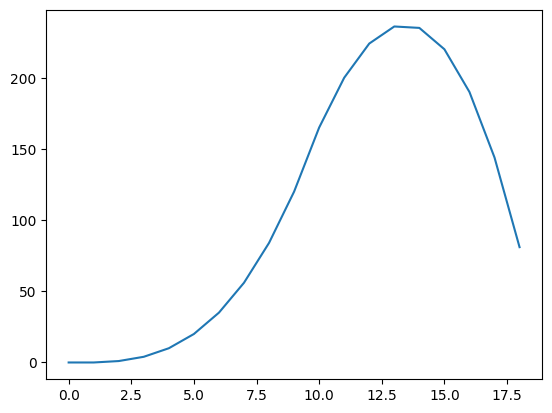

In [4]:
x = np.arange(10)
f = np.arange(10)
y = np.convolve(x, f)
print(y)
plt.plot(y)

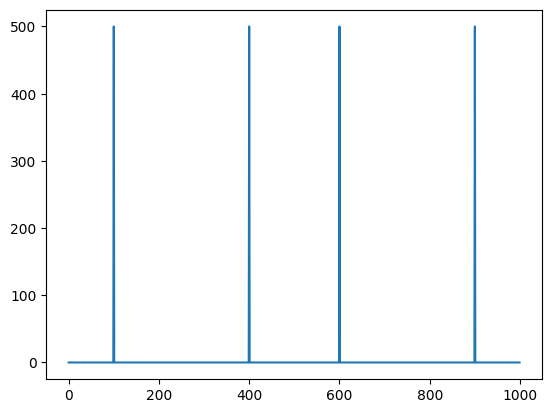

In [9]:
# Example input
t = np.linspace(0, 0.999, 1000)
x = np.sin(2*np.pi*100*t) + np.sin(2*np.pi*400*t)
# plt.plot(t, x)
plt.plot(abs(fft.fft(x)))

<StemContainer object of 3 artists>

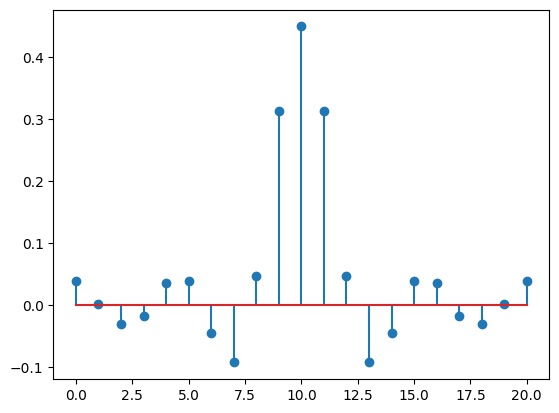

In [14]:
f = ss.remez(21, [0, 200, 250, 500], [1, 0], fs=1000)
plt.stem(f,'o')

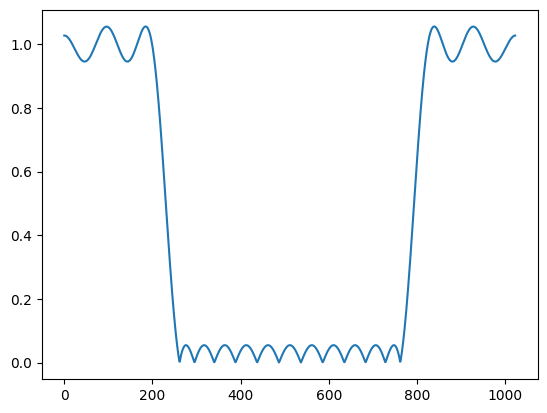

In [15]:
plt.plot(abs(fft.fft(f,1024)))

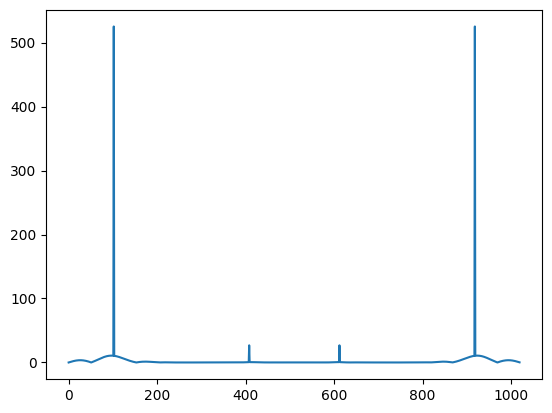

In [18]:
y=np.convolve(x,f)
plt.plot(abs(fft.fft(y)))
# plt.plot(y)

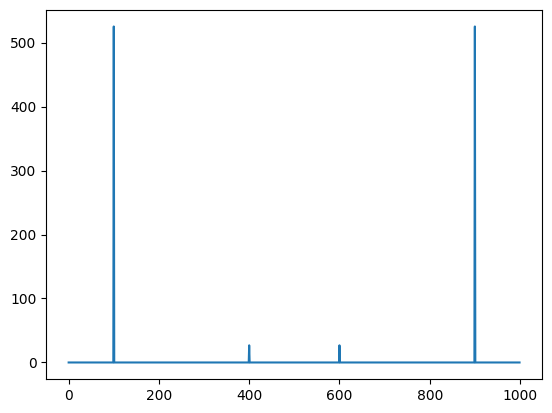

In [19]:
xf = fft.fft(x, 1000)
ff = fft.fft(f, 1000)
yf = fft.ifft(xf * ff)
plt.plot(abs(fft.fft(yf)))